In [92]:
from sqlalchemy import create_engine
import pandas as pd

db_params = {
    'dbname': 'dbacolhe_3lv1',
    'user': 'acolhe_user',
    'password': 'kjMek6kxSSxFAQFJ6m3NQsWRqRyTh1tz',
    'host': 'dpg-ckdivrtjhfbs73bfkf60-a.oregon-postgres.render.com',
    'port': '5432',
}

engine = create_engine(f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

sql_usuarios = "SELECT * FROM usuario"
sql_humor = "SELECT * FROM humor"
sql_clinicas = "SELECT * FROM clinica"

df_usuarios = pd.read_sql_query(sql_usuarios, engine)
df_humor = pd.read_sql_query(sql_humor, engine)
df_clinicas = pd.read_sql_query(sql_clinicas, engine)

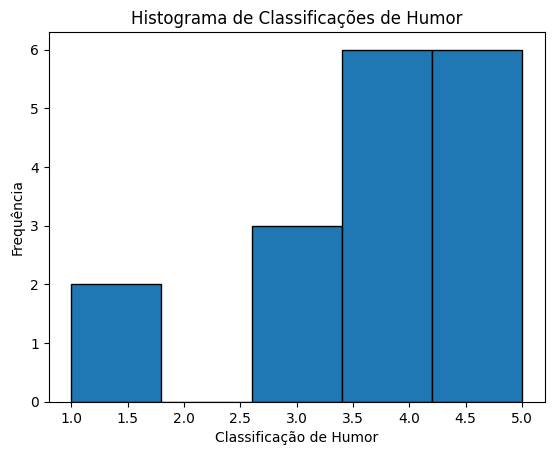

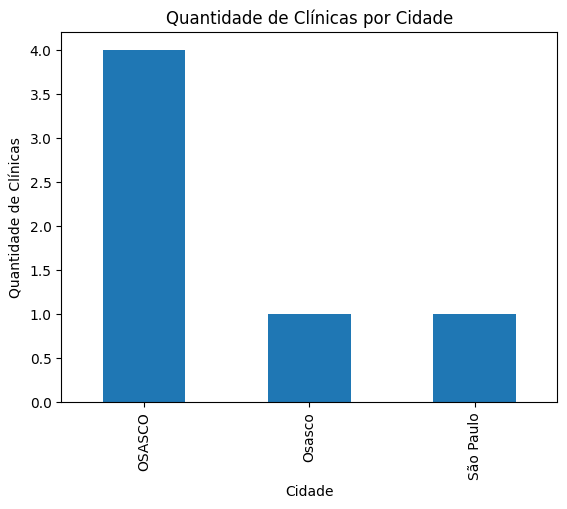

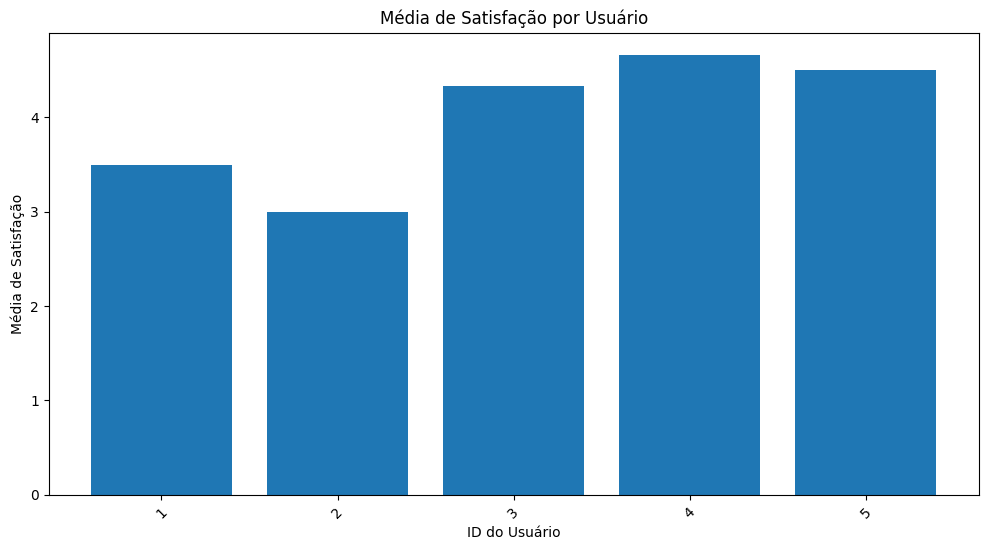

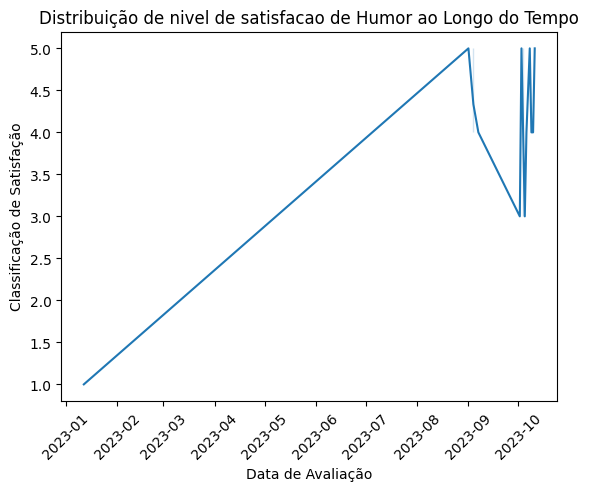

Não há clínicas patrocinadas para criar o gráfico.


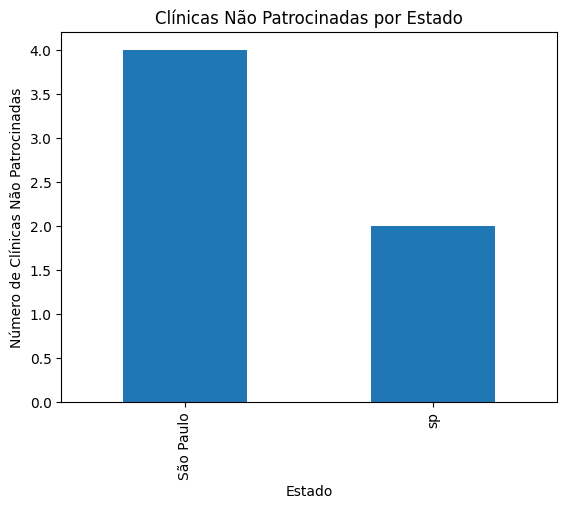

Clínicas sem Informações de Contato:
Empty DataFrame
Columns: [codclinica, nmclinica, email, telefone, descricao, imagem, bairro, cidade, nmestado, sgestado, patrocinada, cod_clinica]
Index: []
Descrição das Clínicas:
Consultório de psicologia especializado no acompanhamento psicoterapêutico de crianças e adolescentes.
None
TESTE
TESTE2.UOU
TESTE 3, ESPERO QUE FUNCIONE!
TESTE4


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

media_satisfacao_por_usuario = df_humor.groupby('codusuario')['nivelsatisfacao'].mean()

import matplotlib.pyplot as plt



plt.hist(df_humor["nivelsatisfacao"], bins=5, range=(1, 5), edgecolor="k")
plt.xlabel("Classificação de Humor")
plt.ylabel("Frequência")
plt.title("Histograma de Classificações de Humor")
plt.show()



clinicas_por_cidade = df_clinicas["cidade"].value_counts()
clinicas_por_cidade.plot(kind="bar")
plt.xlabel("Cidade")
plt.ylabel("Quantidade de Clínicas")
plt.title("Quantidade de Clínicas por Cidade")
plt.show()



plt.figure(figsize=(12, 6))
plt.bar(media_satisfacao_por_usuario.index, media_satisfacao_por_usuario.values)
plt.xlabel("ID do Usuário")
plt.ylabel("Média de Satisfação")
plt.title("Média de Satisfação por Usuário")
plt.xticks(rotation=45)
plt.show()



df_humor["dataavaliacao"] = pd.to_datetime(df_humor["dataavaliacao"])
sns.lineplot(x="dataavaliacao", y="nivelsatisfacao", data=df_humor)
plt.xlabel("Data de Avaliação")
plt.ylabel("Classificação de Satisfação")
plt.title("Distribuição de nivel de satisfacao de Humor ao Longo do Tempo")
plt.xticks(rotation=45)
plt.show()

clinicas_patrocinadas = df_clinicas[df_clinicas["patrocinada"] == True]

if not clinicas_patrocinadas.empty:
    clinicas_patrocinadas_por_estado = clinicas_patrocinadas["nmestado"].value_counts()
    clinicas_patrocinadas_por_estado.plot(kind="bar")
    plt.xlabel("Estado")
    plt.ylabel("Número de Clínicas Patrocinadas")
    plt.title("Clínicas Patrocinadas por Estado")
    plt.show()
else:
    print("Não há clínicas patrocinadas para criar o gráfico.")


clinicas_n_patrocinadas = df_clinicas[df_clinicas["patrocinada"] == False]
if not clinicas_n_patrocinadas.empty:
    clinicas_patrocinadas_por_estado = clinicas_n_patrocinadas["nmestado"].value_counts()
    clinicas_patrocinadas_por_estado.plot(kind="bar")
    plt.xlabel("Estado")
    plt.ylabel("Número de Clínicas Não Patrocinadas")
    plt.title("Clínicas Não Patrocinadas por Estado")
    plt.show()
else:
    print("Não há clínicas não patrocinadas para criar o gráfico.")



clinicas_sem_contato = df_clinicas[df_clinicas["email"].isna() & df_clinicas["telefone"].isna()]
print("Clínicas sem Informações de Contato:")
print(clinicas_sem_contato)

descricao_clinicas = df_clinicas["descricao"].tolist()
print("Descrição das Clínicas:")
for desc in descricao_clinicas:
    print(desc)


In [94]:
from termcolor import colored

classificacao_media = df_humor["nivelsatisfacao"].mean()

if classificacao_media < 2.5:
    conclusao_humor = "A média de satisfação de humor é baixa, o que pode indicar problemas no usuário."
    conclusao_humor = colored(conclusao_humor, 'red')
elif 2.5 <= classificacao_media < 3.5:
    conclusao_humor = "A média de satisfação de humor é moderada. Há espaço para melhorias no usuário."
    conclusao_humor = colored(conclusao_humor, 'yellow')
else:
    conclusao_humor = "A média de satisfação de humor é alta, o que é positivo para o usuário."
    conclusao_humor = colored(conclusao_humor, 'green')

if clinicas_por_cidade.empty:
    conclusao_clinicas = "Não há dados disponíveis para análise de clínicas por cidade."
    conclusao_clinicas = colored(conclusao_clinicas, 'yellow')
else:
    conclusao_clinicas = "Existem clínicas em várias cidades, mas a distribuição varia de cidade para cidade."
    conclusao_clinicas = colored(conclusao_clinicas, 'green')

if clinicas_sem_contato.empty:
    conclusao_clinicas_sem_contato = "Todas as clínicas têm informações de contato disponíveis."
    conclusao_clinicas_sem_contato = colored(conclusao_clinicas_sem_contato, 'green')
else:
    conclusao_clinicas_sem_contato = "Algumas clínicas não fornecem informações de contato. Isso pode afetar a acessibilidade."
    conclusao_clinicas_sem_contato = colored(conclusao_clinicas_sem_contato, 'yellow')

if not descricao_clinicas:
    conclusao_descricao_clinicas = "Não há descrições disponíveis para as clínicas."
    conclusao_descricao_clinicas = colored(conclusao_descricao_clinicas, 'yellow')
else:
    conclusao_descricao_clinicas = "As clínicas têm descrições variadas que podem fornecer informações úteis aos usuários."
    conclusao_descricao_clinicas = colored(conclusao_descricao_clinicas, 'green')

if media_satisfacao_por_usuario.empty:
    conclusao_media_satisfacao_usuario = "Não há dados disponíveis para calcular a média de satisfação por usuário."
    conclusao_media_satisfacao_usuario = colored(conclusao_media_satisfacao_usuario, 'yellow')
else:
    conclusao_media_satisfacao_usuario = "A média de satisfação por usuário foi calculada com base nos dados disponíveis."
    conclusao_media_satisfacao_usuario = colored(conclusao_media_satisfacao_usuario, 'green')

print("Conclusão sobre a satisfação média de humor:", conclusao_humor)
print("Conclusão sobre a quantidade de clínicas por cidade:", conclusao_clinicas)
print("Conclusão sobre clínicas sem informações de contato:", conclusao_clinicas_sem_contato)
print("Conclusão sobre a descrição das clínicas:", conclusao_descricao_clinicas)
print("Conclusão sobre a média de satisfação por usuário:", conclusao_media_satisfacao_usuario)


Conclusão sobre a satisfação média de humor: A média de satisfação de humor é alta, o que é positivo para o usuário.
Conclusão sobre a quantidade de clínicas por cidade: Existem clínicas em várias cidades, mas a distribuição varia de cidade para cidade.
Conclusão sobre clínicas sem informações de contato: Todas as clínicas têm informações de contato disponíveis.
Conclusão sobre a descrição das clínicas: As clínicas têm descrições variadas que podem fornecer informações úteis aos usuários.
Conclusão sobre a média de satisfação por usuário: A média de satisfação por usuário foi calculada com base nos dados disponíveis.


In [95]:
engine.dispose()